In [1]:
import pandas as pd
df=pd.read_csv('../Datasets/2mtn_comments_analysis.csv')

In [2]:
df.head()

,commentAuthor,commentLikesCount,commentText,commentTimestamp,postCommentsCount,postDescription,postLikesCount,postTimestamp,postUrl,profileDescription,sentiment/finalClassification,sentiment/finalScore,sentiment/negativeScore,sentiment/neutralScore,sentiment/positiveScore,targetPlatform
0,Ikechukwu Agudile,0,Highly Commendable celebration! MTN keep up th...,2024-12-04T08:31:52.000Z,58,"Today, we celebrated the International Day of ...",60,2024-12-03T17:44:05.000Z,https://www.facebook.com/MTNLoaded/videos/1572...,NaN,positive,0.989134,0.003207,0.007658,0.989134,facebook
1,Davidson Uba,0,"MTN, please, if you can afford to, reach out t...",2024-12-04T10:30:43.000Z,58,"Today, we celebrated the International Day of ...",60,2024-12-03T17:44:05.000Z,https://www.facebook.com/MTNLoaded/videos/1572...,NaN,neutral,0.741459,0.044676,0.741459,0.213865,facebook
2,Solomon Shekwobhasheawe Tatari,0,My MTN network just ceased. I rebooted my phon...,2024-12-03T19:01:46.000Z,58,"Today, we celebrated the International Day of ...",60,2024-12-03T17:44:05.000Z,https://www.facebook.com/MTNLoaded/videos/1572...,NaN,negative,0.851354,0.851354,0.138272,0.010374,facebook
3,Davidson Uba,0,"MTN, please investigate. When I 'recharge' ₦10...",2024-12-04T10:34:33.000Z,58,"Today, we celebrated the International Day of ...",60,2024-12-03T17:44:05.000Z,https://www.facebook.com/MTNLoaded/videos/1572...,NaN,negative,0.908166,0.908166,0.085093,0.006741,facebook
4,Emmanuel Effiong,0,MTN network a problem to me now,2024-12-03T21:11:02.000Z,58,"Today, we celebrated the International Day of ...",60,2024-12-03T17:44:05.000Z,https://www.facebook.com/MTNLoaded/videos/1572...,NaN,negative,0.761013,0.761013,0.223816,0.015170,facebook


In [3]:
print(len(df))

13084


In [4]:
df.columns

Index(['commentAuthor', 'commentLikesCount', 'commentText', 'commentTimestamp',
       'postCommentsCount', 'postDescription', 'postLikesCount',
       'postTimestamp', 'postUrl', 'profileDescription',
       'sentiment/finalClassification', 'sentiment/finalScore',
       'sentiment/negativeScore', 'sentiment/neutralScore',
       'sentiment/positiveScore', 'targetPlatform'],
      dtype='object')

In [5]:
#total unique commentor
import numpy as np
print(len(np.unique(df['commentAuthor'])))

8655


In [6]:
# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the highest commenter
highest_commenter = comment_counts.idxmax()
highest_comment_count = comment_counts.max()

print(f"The highest commenter is: {highest_commenter} with {highest_comment_count} comments.")

The highest commenter is: Ikechukwu Agudile with 195 comments.


In [7]:
# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the top 5 commenters
top_5_commenters = comment_counts.head(5)

# Print the results
print("Top 5 commenters and their comment counts:")
for commenter, count in top_5_commenters.items():
    print(f"{commenter}: {count} comments")


Top 5 commenters and their comment counts:
Ikechukwu Agudile: 195 comments
MTN Nigeria: 175 comments
Vee Ikeh-Uzoma: 69 comments
Wil Mascaras: 62 comments
Ebere Good S Will: 61 comments


In [8]:
import pandas as pd

# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the top 5 commenters
top_5_commenters = comment_counts.head(5)

# Create a DataFrame for the top 5 commenters
top_5_table = pd.DataFrame({
    'Commenter': top_5_commenters.index,
    'Comment Count': top_5_commenters.values
})

# Print the table
print(top_5_table)


           Commenter  Comment Count
0  Ikechukwu Agudile            195
1        MTN Nigeria            175
2     Vee Ikeh-Uzoma             69
3       Wil Mascaras             62
4  Ebere Good S Will             61


In [9]:
# Group by 'commentAuthor' and sum the 'postCommentsCount' to count all comments for each user
comment_counts = df.groupby('commentAuthor')['postCommentsCount'].sum()

# Sort by comment counts in descending order
sorted_comment_counts = comment_counts.sort_values(ascending=False)

# Get the top 5 commenters
top_5_commenters = sorted_comment_counts.head(5)

# Create a DataFrame for the top 5 commenters
top_5_table = pd.DataFrame({
    'Commenter': top_5_commenters.index,
    'Comment Count': top_5_commenters.values
})

# Print the table
print(top_5_table)

                     Commenter  Comment Count
0                  MTN Nigeria          45387
1            Ikechukwu Agudile          23413
2            Ebere Good S Will          11078
3  Ekediegwu Henry Chukwunonso           9799
4                 Wil Mascaras           9205


In [10]:


# Convert commentTimestamp to datetime
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])

# Filter out 'MTN Nigeria' from the dataset
df = df[df['commentAuthor'] != 'MTN Nigeria']

# Extract the month and year from the commentTimestamp
df['month_year'] = df['commentTimestamp'].dt.to_period('M')

# Group by commentAuthor and month_year, then sum the comments count
monthly_comments = df.groupby(['commentAuthor', 'month_year'])['postCommentsCount'].sum().reset_index()

# Find the highest contributor for each month
highest_contributors = monthly_comments.loc[monthly_comments.groupby('month_year')['postCommentsCount'].idxmax()]

# Display the results
print("Highest contributors for each month (excluding 'MTN Nigeria'):")
print(highest_contributors)

Highest contributors for each month (excluding 'MTN Nigeria'):
            commentAuthor month_year  postCommentsCount
7569  Prince Aminu Saraki    2024-08               5400
4203    Ikechukwu Agudile    2024-09               6660
4204    Ikechukwu Agudile    2024-10               6693
4205    Ikechukwu Agudile    2024-11               5857
608   Agbongbn Ifa Faniyi    2024-12                582


C:\Users\LCT\AppData\Local\Temp\ipykernel_6552\3900795745.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


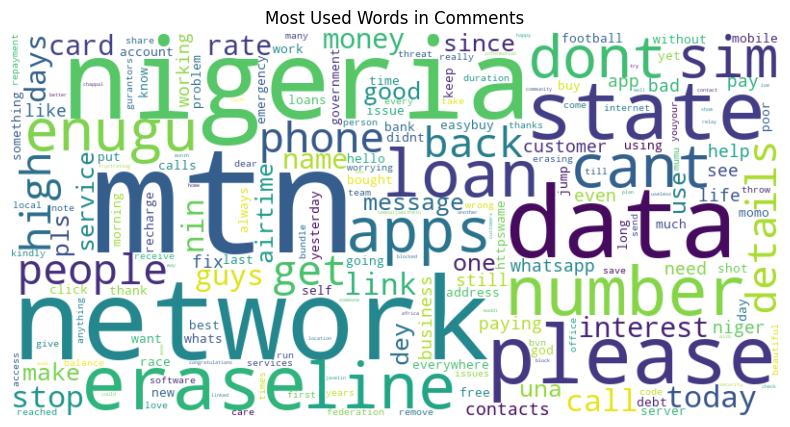

Top 20 Most Common Words in Comments:
mtn: 4905
network: 2596
nigeria: 2504
data: 1895
please: 1566
state: 1560
erase: 1320
number: 1047
loan: 990
line: 925
apps: 833
cant: 801
enugu: 743
dont: 731
sim: 716
people: 713
phone: 703
get: 690
high: 678
details: 637


In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# df = pd.read_csv('your_file.csv')  # Uncomment this line if loading from a CSV file

# Combine all comment texts into a single string
all_comments = " ".join(df['commentText'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.lower()                  # Convert to lowercase
    return text

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 10 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


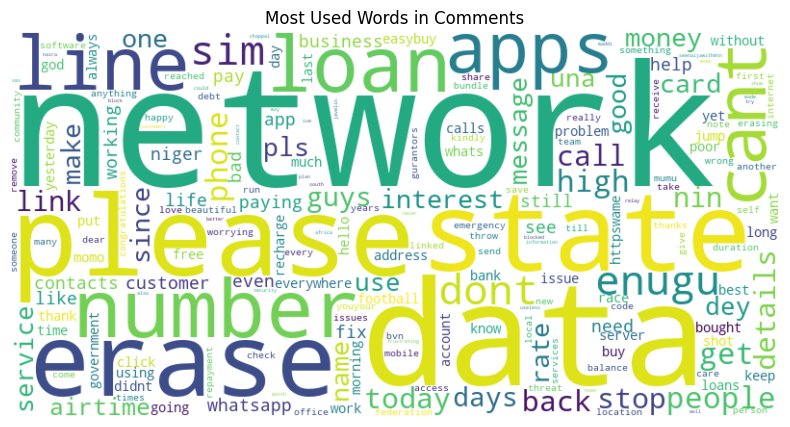

Top 20 Most Common Words in Comments:
network: 2596
data: 1895
please: 1566
state: 1560
erase: 1320
number: 1047
loan: 990
line: 925
apps: 833
cant: 801
enugu: 743
dont: 731
sim: 716
people: 713
phone: 703
get: 690
high: 678
details: 637
back: 637
today: 635


In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer data if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# Uncomment and update this line to load your data
# df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the actual file path

# Combine all comment texts into a single string
all_comments = " ".join(df['commentText'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = text.lower()                  # Convert to lowercase
    return text.strip()

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['mtn', 'airtel', 'nigeria', 'other'])  # Add specific words to exclude

# Remove stopwords
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 20 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


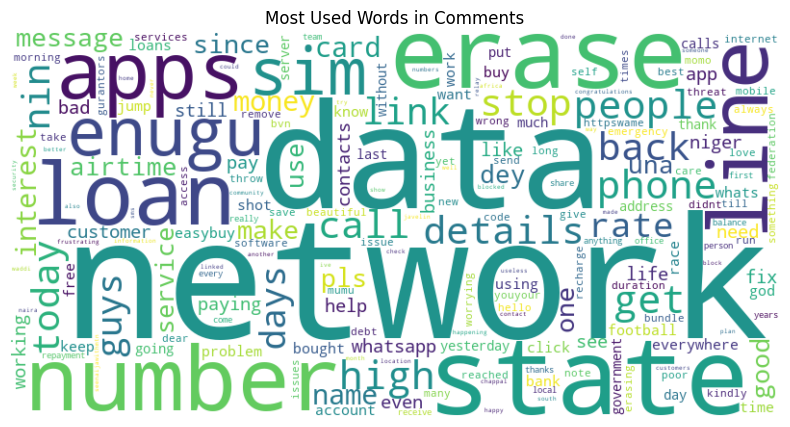

Top 20 Most Common Words in Comments:
network: 2596
data: 1895
state: 1560
erase: 1320
number: 1047
loan: 990
line: 925
apps: 833
enugu: 743
sim: 716
people: 713
phone: 703
get: 690
high: 678
details: 637
back: 637
today: 635
stop: 623
call: 617
nin: 593


In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer data if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# Uncomment and update this line to load your data
# df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the actual file path

# Combine all comment texts into a single string
all_comments = " ".join(df['commentText'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = text.lower()                  # Convert to lowercase
    return text.strip()

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['mtn', 'airtel', 'nigeria', 'other', 
                         'can', 'cant', 'do', 'dont', 'please'])  # Add specific words to exclude

# Remove stopwords
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 20 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")
